In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
def read_yaml(file):
    original = dict()
    temp = dict()
    read = ""
    tax = ""
    for line in file: 
        if len(line) - len(line.lstrip()) == 0:
            original.update(temp)
            tax = line.lstrip().split(":")[0]
            temp.update({tax: {}})
        elif len(line) - len(line.lstrip()) == 2:
            read = line.lstrip().split(":")[0]
            temp.get(tax).update({read: []})
        else:
            temp.get(tax).get(read).append(line.lstrip().strip())
    return original

In [3]:

with open("E:/university/Master/Thesis/Code/taxonomic_segmentation/taxonomic_segmentation_original_summary.yml", 'r') as file:
    original = read_yaml(file)
            
original

{'Acetobacteraceae': {'674': ['[2:395]', '[2:395]'],
  '1254': ['[4:1503]'],
  '813': ['[9030:11179]', '[9036:11185]', '[11253:12595]', '[19267:20171]'],
  '1619': ['[4710:6605]', '[4871:6605]', '[4961:6605]'],
  '1495': ['[11064:12945]'],
  '1031': ['[15146:16032]'],
  '509': ['[8187:9839]', '[9848:10574]', '[13288:13503]']},
 'F082': {'662': ['[8470:8811]', '[8470:8811]', '[8470:8811]']},
 'Beijerinckiaceae': {'293': ['[1446:2671]',
   '[4512:5319]',
   '[5325:7484]',
   '[17011:18107]',
   '[17014:18110]',
   '[17014:18110]',
   '[30451:32243]',
   '[30451:32243]',
   '[30451:32243]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[30454:32231]',
   '[

In [4]:
with open("E:/university/Master/Thesis/Code/taxonomic_segmentation/taxonomic_segmentation_summary.yml", 'r') as file:
    derived= read_yaml(file)
derived

{'Xanthobacteraceae': {'293': ['[39281:40409]'], '1265': ['[505:10890]']},
 'Amorphaceae': {'813': ['[4245:20375]']},
 'Acetobacteraceae': {'813': ['[20376:22130]'], '1495': ['[13097:13981]']},
 'TH1-2': {'1286': ['[1029:20302]'],
  '1560': ['[3306:14650]'],
  '293': ['[12264:30450]', '[42029:57253]'],
  '674': ['[392:29302]', '[31554:33949]'],
  '675': ['[4646:34235]'],
  '1279': ['[18133:20536]'],
  '1499': ['[9921:13489]'],
  '335': ['[926:52148]'],
  '698': ['[20923:33587]'],
  '633': ['[1526:34776]'],
  '1254': ['[4207:14666]'],
  '417': ['[2392:33137]', '[36601:45953]'],
  '1318': ['[19128:19127]'],
  '1495': ['[13982:13981]'],
  '1471': ['[12963:17061]'],
  '662': ['[937:32824]'],
  '488': ['[4891:40415]'],
  '1202': ['[5392:11106]'],
  '467': ['[1653:41669]'],
  '1265': ['[10891:20157]'],
  '869': ['[15542:29129]'],
  '707': ['[1730:32944]']},
 'Beijerinckiaceae': {'293': ['[1410:12263]'], '430': ['[40300:45711]']},
 'Hyphomicrobiaceae': {'813': ['[22131:29053]']},
 'Caulobacte

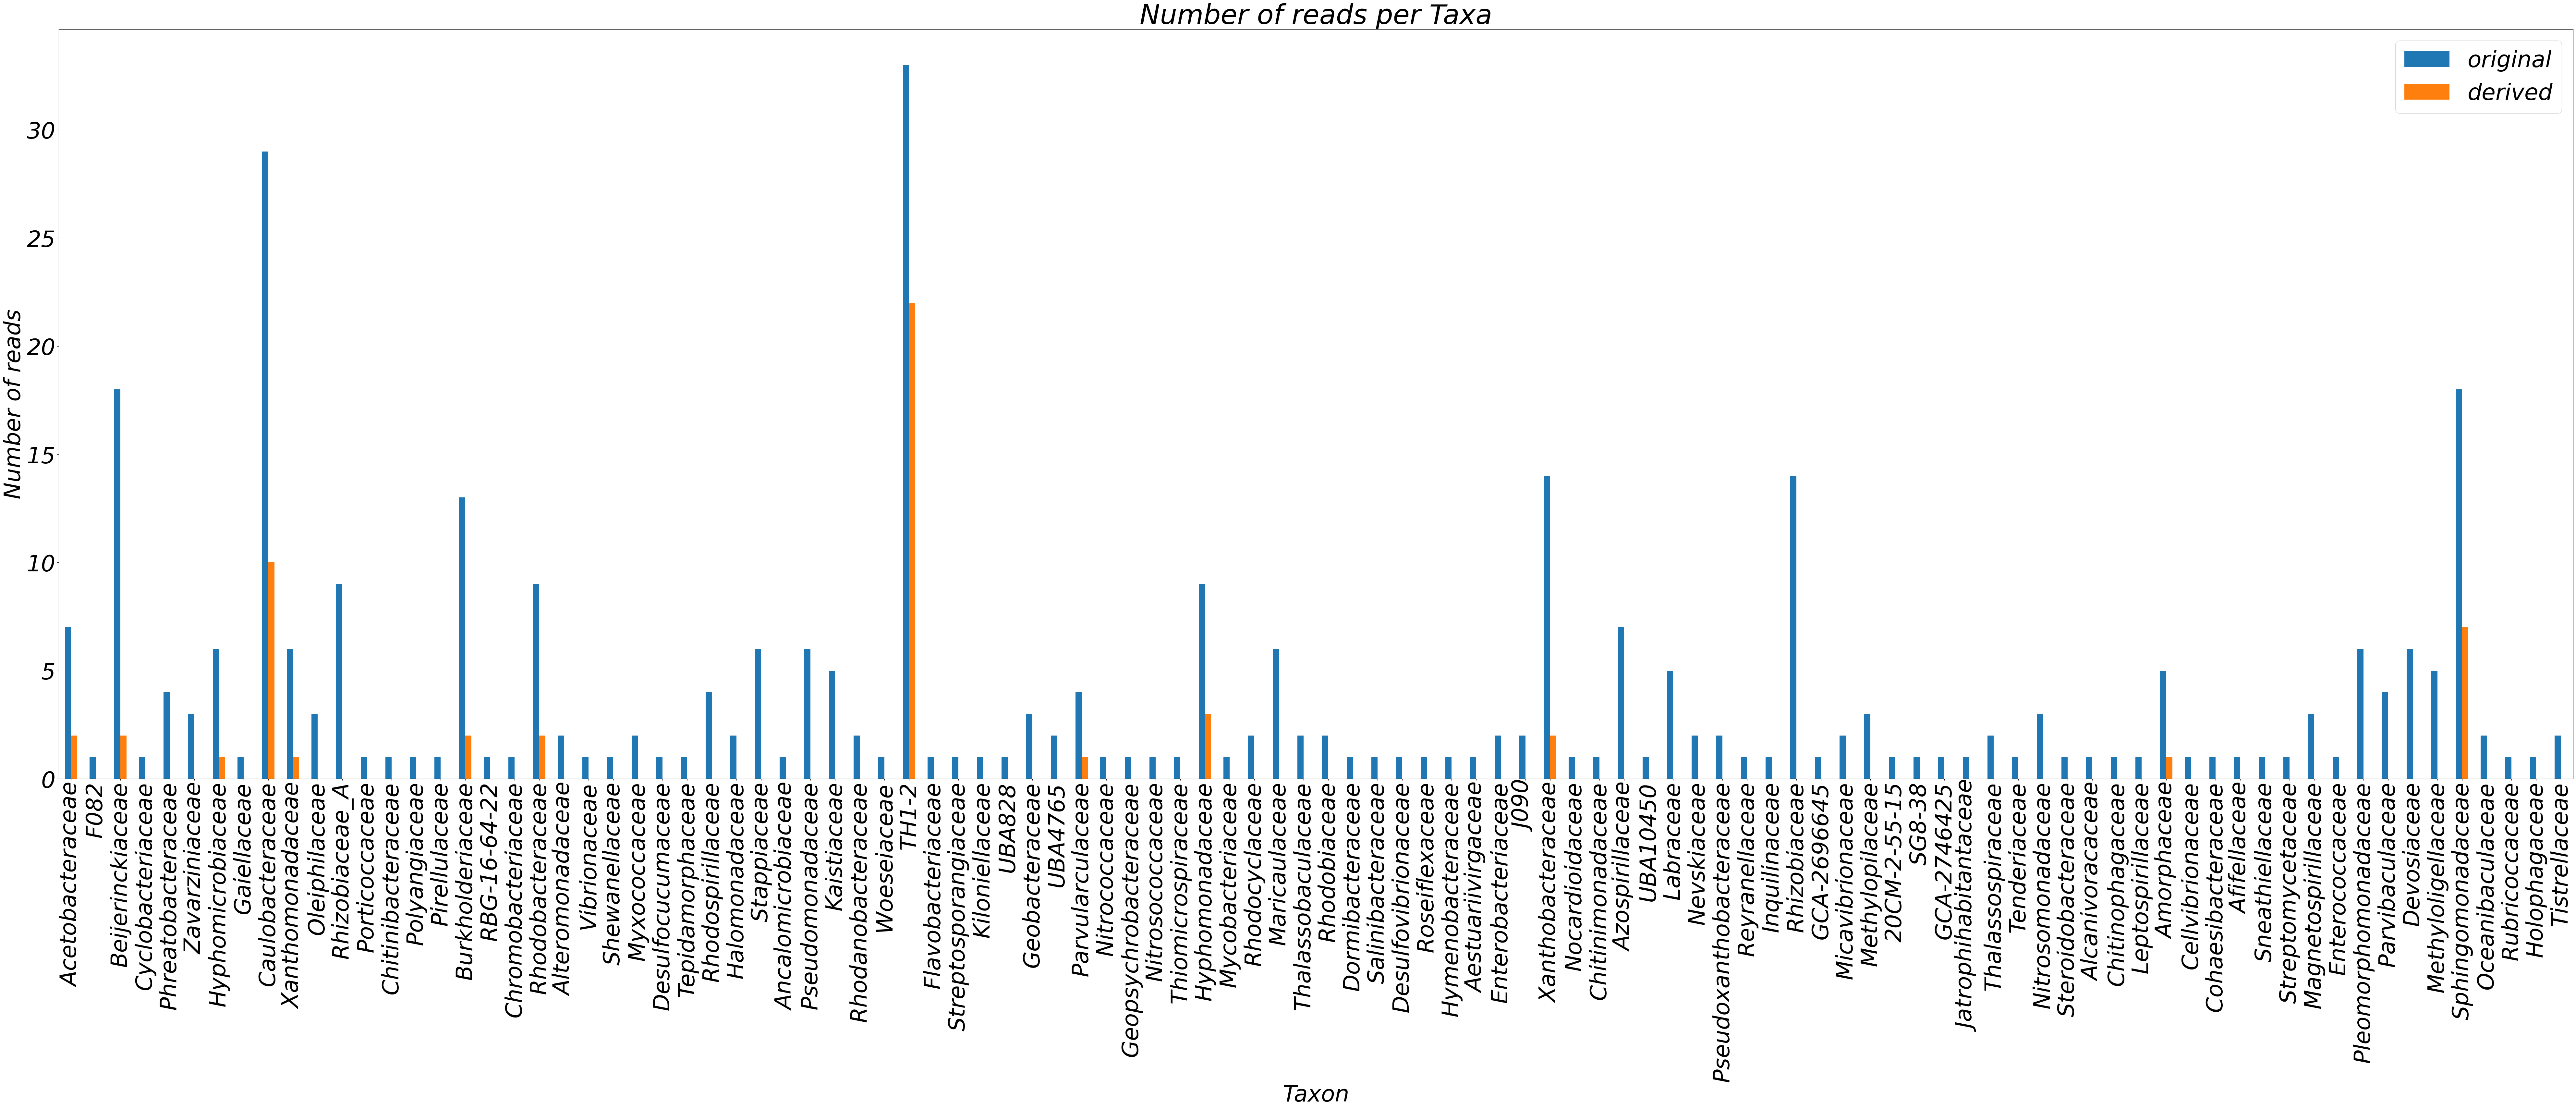

In [9]:
number_of_read_ori = {k : len(v) for (k,v) in original.items()}

number_of_read_der =  {k : len(v) for (k,v) in derived.items()}

for key in number_of_read_ori:
    if key not in number_of_read_der:
        number_of_read_der.update({key: 0})

series_ori = pd.Series(number_of_read_ori)
series_der = pd.Series(number_of_read_der)
matplotlib.rcParams.update({'font.size': 50})
df = pd.DataFrame().assign(original=series_ori, derived = series_der )
df.plot(kind="bar", figsize=(100, 30))
plt.title("Number of reads per Taxa")
plt.xlabel("Taxon")
plt.ylabel("Number of reads");
plt.savefig('nor.png', bbox_inches='tight')


In [6]:
number_of_tax_ori = dict()
for key, value in original.items():
    for read in value.keys():
        number_of_tax_ori.update({read: number_of_tax_ori.get(read, 0) +1})
        
number_of_tax_der = dict()
for key, value in derived.items():
    for read in value.keys():
        number_of_tax_der.update({read: number_of_tax_der.get(read, 0) +1})
for key in number_of_tax_ori: 
    if key not in number_of_tax_der:
        number_of_tax_der.update({key: 0})


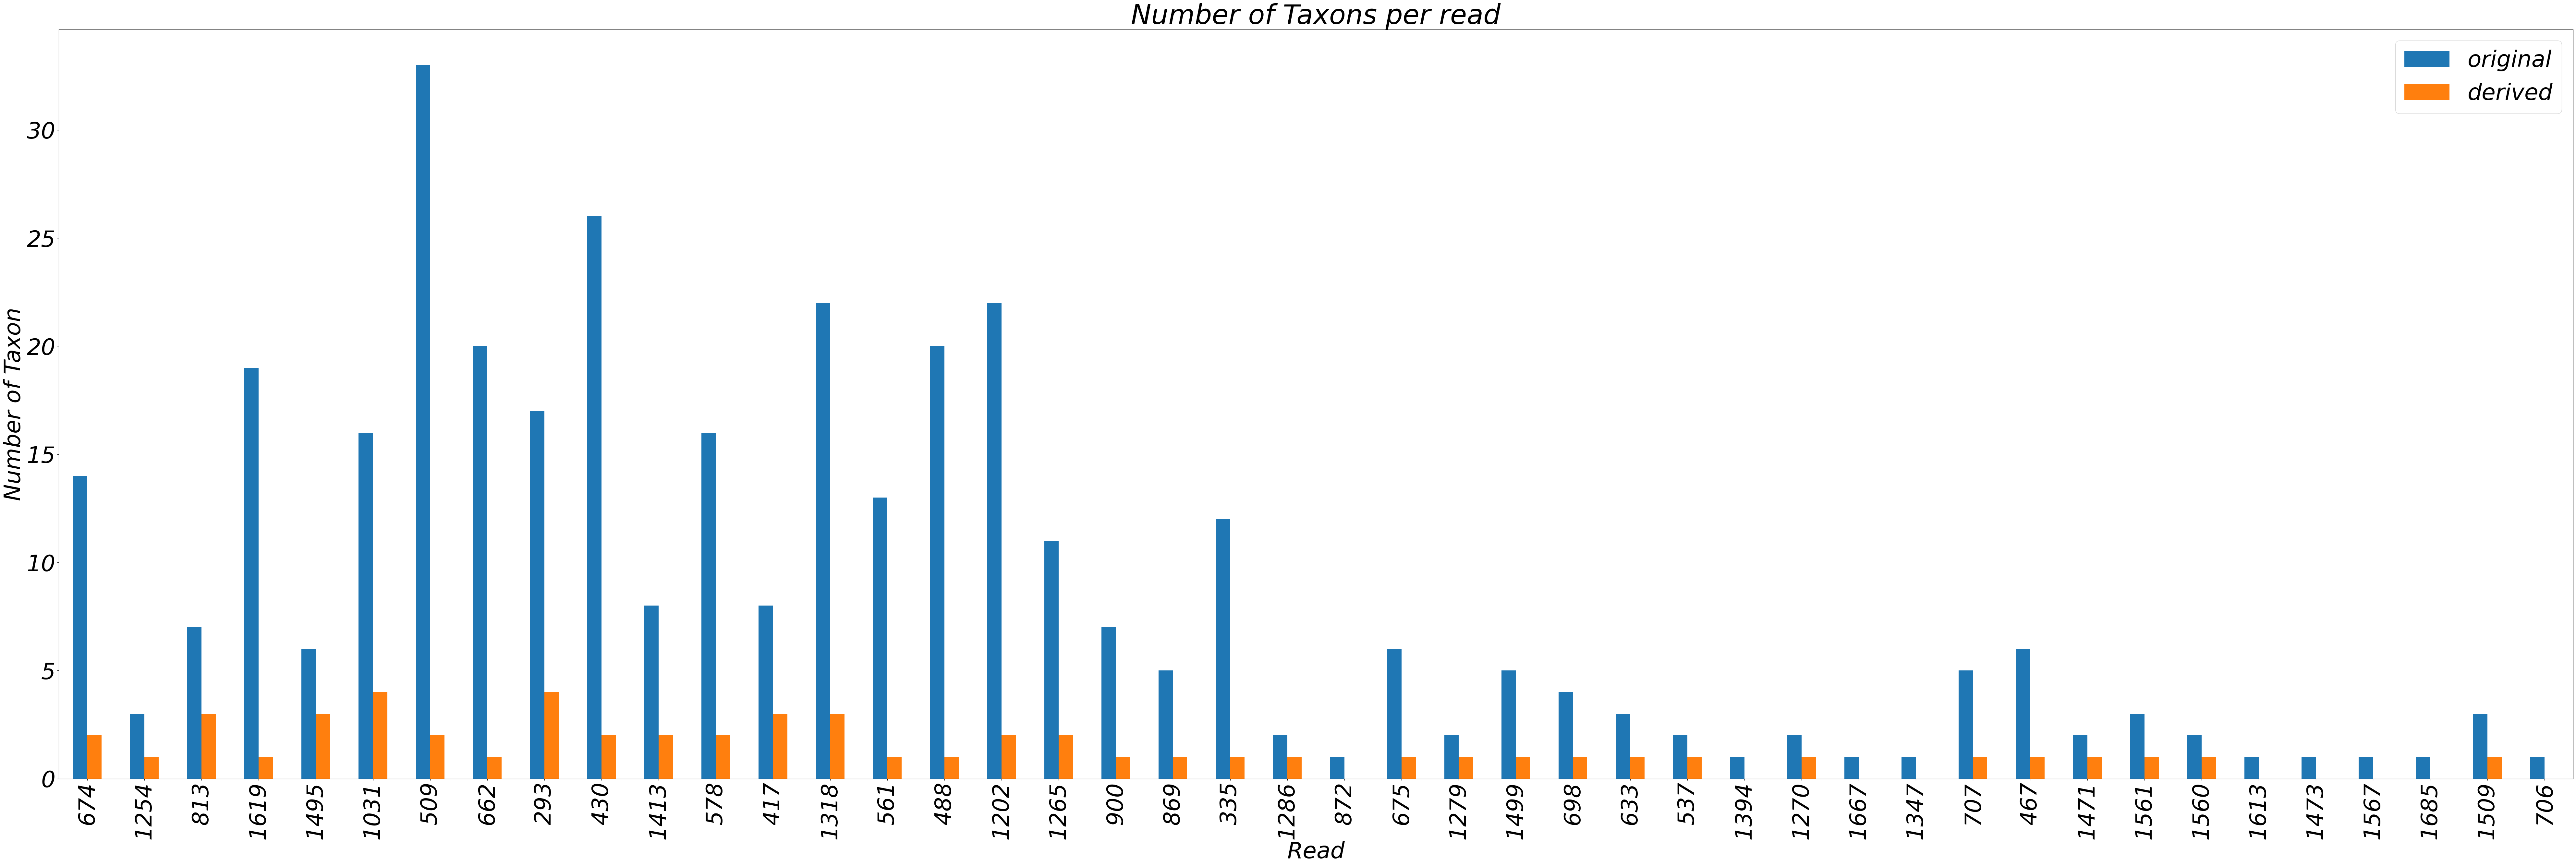

In [8]:
series_ori = pd.Series(number_of_tax_ori)
series_der = pd.Series(number_of_tax_der)
matplotlib.rcParams.update({'font.size': 50})
df = pd.DataFrame().assign(original=series_ori, derived = series_der )
df.plot(kind="bar", figsize=(100, 30))
plt.title("Number of Taxons per read")
plt.xlabel("Read")
plt.ylabel("Number of Taxon");
plt.savefig('not.png', bbox_inches='tight')